# Data Prep

In [402]:
# Loading in the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading in the Data Frame

In [403]:
# loading in the csv
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Combined_Teams_2024_Updated.csv')
df.head()

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,wins,...,move_3_power,move_3_effect,move_3_effect_chance,move_3_accuracy,move_3_generation,move_4_power,move_4_effect,move_4_effect_chance,move_4_accuracy,move_4_generation
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1,9,...,80.0,Inflicts regular damage.,NaN,100.0,6.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,5.0
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1,9,...,120.0,Inflicts regular damage. User takes 1/3 the d...,NaN,100.0,4.0,NaN,"Until the end of this turn, any moves that opp...",NaN,100.0,3.0
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1,9,...,120.0,"Inflicts regular damage, then lowers the user'...",100.0,100.0,4.0,40.0,Inflicts regular damage.,NaN,100.0,4.0
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1,9,...,40.0,Inflicts regular damage. Causes the target to...,100.0,100.0,3.0,NaN,Inflicts regular damage. Power increases with...,NaN,100.0,1.0
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1,9,...,NaN,Erects a barrier around the user's side of the...,NaN,100.0,1.0,NaN,"For the next three turns, all Pokémon on the u...",NaN,100.0,4.0


## Preparing to conduct Multinomial Naive Bayes

In [404]:
# Dropping the columns that are non-discrete
# Dropping the columns stat_toal, hp, attack, defense, special_attack, special_defense, speed, move_1_power, move_1_effect, move_1_accuracy, move_2_power, move_2_effect, move_2_accuracy, move_3_power, move_3_effect, move_3_accuracy, move_4_power, move_4_effect, move_4_accuracy
df = df.drop(['wins','losses','stat_total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'move_1_power', 'move_1_effect', 'move_1_effect_chance', 'move_1_accuracy','move_1_generation', 'move_2_power', 'move_2_effect','move_2_effect_chance', 'move_2_accuracy','move_2_generation', 'move_3_power', 'move_3_effect','move_3_effect_chance', 'move_3_accuracy','move_3_generation', 'move_4_power', 'move_4_effect','move_4_effect_chance', 'move_4_accuracy','move_4_generation','type', 'pokemon_generation'], axis=1)
# Dropping the type 2 column as it has a lot of missing values as well as type 1 column as its data is captured in the type column
df = df.drop(['type_one', 'type_two'], axis=1)
#split into 4 different dataframes based on the tournament
df_worlds = df[df['tournament'] == 'worlds']
df_LAI = df[df['tournament'] == 'latin america international']
df_EI = df[df['tournament'] == 'europe international']
df_NI = df[df['tournament'] == 'north america international']

In [405]:
# Based on the Tournament Column we will change the rank column to be 'great' if the rank is in the top 20%, 'okay' if the rank is in the middle 60%, and 'bad' if the rank is in the bottom 20%
# Worlds Has 106 Teams so the top 20% is up to rank 21, the middle 60% is above 21 and below 84, and the bottom 20% is anything at or above 84
df_worlds['rank_category'] = 'bad'  # Default to 'bad'
df_worlds.loc[df_worlds['rank'] <= 21, 'rank_category'] = 'great'
df_worlds.loc[(df_worlds['rank'] > 21) & (df_worlds['rank'] < 84), 'rank_category'] = 'okay'
#LAI has 128 Teams so the top 20% is up to rank 25, the middle 60% is above 25 and below 102, and the bottom 20% is anything at or above 102
df_LAI['rank_category'] = 'bad'  # Default to 'bad'
df_LAI.loc[df_LAI['rank'] <= 25, 'rank_category'] = 'great'
df_LAI.loc[(df_LAI['rank'] > 25) & (df_LAI['rank'] < 102), 'rank_category'] = 'okay'
#EI has 128 Teams so the top 20% is up to rank 25, the middle 60% is above 25 and below 102, and the bottom 20% is anything at or above 102
df_EI['rank_category'] = 'bad'  # Default to 'bad'
df_EI.loc[df_EI['rank'] <= 25, 'rank_category'] = 'great'
df_EI.loc[(df_EI['rank'] > 25) & (df_EI['rank'] < 102), 'rank_category'] = 'okay'
#NI has 252 Teams so the top 20% is up to rank 50, the middle 60% is above 50 and below 201, and the bottom 20% is anything at or above 201
df_NI['rank_category'] = 'bad'  # Default to 'bad'
df_NI.loc[df_NI['rank'] <= 50, 'rank_category'] = 'great'
df_NI.loc[(df_NI['rank'] > 50) & (df_NI['rank'] < 201), 'rank_category'] = 'okay'
# sort the dataframes by rank
df_worlds = df_worlds.sort_values(by='rank')
df_LAI = df_LAI.sort_values(by='rank')
df_EI = df_EI.sort_values(by='rank')
df_NI = df_NI.sort_values(by='rank')

#combine the dataframes back into one
df = pd.concat([df_worlds, df_LAI, df_EI, df_NI])
df.head()

C:\Users\ryhen\AppData\Local\Temp\ipykernel_34512\865259364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_worlds['rank_category'] = 'bad'  # Default to 'bad'
C:\Users\ryhen\AppData\Local\Temp\ipykernel_34512\865259364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LAI['rank_category'] = 'bad'  # Default to 'bad'
C:\Users\ryhen\AppData\Local\Temp\ipykernel_34512\865259364.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,tournament,rank_category
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1,worlds,great
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1,worlds,great
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1,worlds,great
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1,worlds,great
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1,worlds,great


In [406]:
# Move the rank_category column to the front of the dataframe
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('rank_category')))
df = df[cols]
# change the rank_category column to be an integer
df['rank_category'] = df['rank_category'].map({'bad': 0, 'okay': 1, 'great': 2})
#drop the rank column
df = df.drop(['rank'], axis=1)

#save the cleaned data
df.to_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/Naive_Bayes/Naive_Bayes_Data.csv', index=False)
df.head()


,rank_category,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,tournament
0,2,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,worlds
1,2,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,worlds
2,2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,worlds
3,2,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,worlds
4,2,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,worlds


# Conducting Multinomial Naive Bayes

In [407]:
# Select features and target variable
features = ['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4']
target = 'rank_category'

features = df[features]
target = df[target]

# Encode the categorical features
features = features.apply(LabelEncoder().fit_transform)
features

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
0,80,16,48,4,44,38,32,198
1,84,41,68,6,157,103,226,62
2,130,38,137,18,31,188,26,6
3,58,3,91,0,39,216,56,102
4,135,22,82,1,110,52,114,178
...,...,...,...,...,...,...,...,...
2935,124,38,82,8,10,99,198,131
2936,130,12,137,1,192,25,193,196
2937,117,49,17,16,38,38,129,131
2939,25,80,134,9,190,127,46,131


In [408]:
# Define X (features) and y (target)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)

In [409]:
X_train

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
3850,132,80,33,18,58,143,225,140
873,83,53,109,8,127,99,125,8
3052,58,3,91,18,52,216,42,76
3325,130,14,137,18,5,25,195,196
625,54,77,89,18,4,68,88,193
...,...,...,...,...,...,...,...,...
3350,2,22,94,1,159,24,153,128
1945,130,14,137,9,168,25,216,89
4428,37,16,87,10,110,165,101,180
989,35,97,2,6,128,32,130,193


In [410]:
X_test

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
3786,53,86,56,8,95,217,136,52
2682,18,38,119,8,88,185,165,131
4276,84,41,68,6,94,218,71,165
2655,53,86,56,8,59,132,56,96
951,37,17,88,4,29,165,125,124
...,...,...,...,...,...,...,...,...
3138,100,3,42,12,52,218,78,196
3992,130,38,137,8,31,185,26,203
105,37,7,87,12,127,32,101,110
1970,130,14,137,18,186,188,26,6


In [411]:
# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)


0.3658810325476992
              precision    recall  f1-score   support

           0       0.27      0.26      0.26       222
           1       0.58      0.43      0.49       516
           2       0.16      0.29      0.20       153

    accuracy                           0.37       891
   macro avg       0.33      0.33      0.32       891
weighted avg       0.43      0.37      0.39       891



array([[ 58,  93,  71],
       [122, 223, 171],
       [ 37,  71,  45]], dtype=int64)

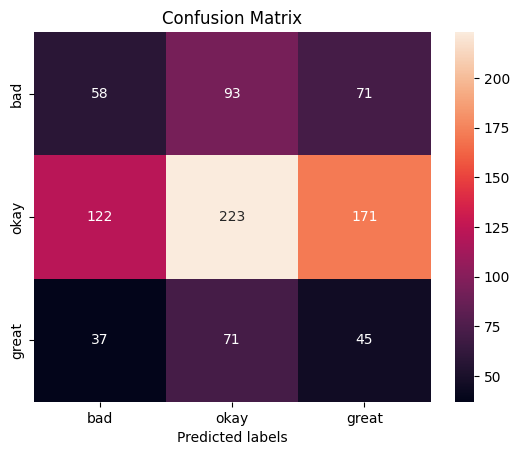

In [412]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great']);
#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/ScreenShots/Naive_Bayes_Confusion_Matrix.png')
plt.show()


# Gaussian Naive Bayes

In [413]:
# loading in the csv
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Combined_Teams_2024_Updated.csv')


In [414]:
# Dropping the columns that are categorical
df = df.drop(['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4', 'tournament','type','rank','wins'], axis=1)
# Dropping the type 2 column as it has a lot of missing values as well as type 1 column as its data is captured in the type column
df = df.drop(['type_one', 'type_two','move_1_effect', 'move_1_effect_chance', 'move_2_effect_chance','move_2_effect', 'move_3_effect_chance','move_3_effect', 'move_4_effect_chance','move_4_effect'], axis=1)

# Fixing nan values
#for missing values in move_1_power, move_2_power, move_3_power, and move_4_power we will fill them with 0
df['move_1_power'] = df['move_1_power'].fillna(0)
df['move_2_power'] = df['move_2_power'].fillna(0)
df['move_3_power'] = df['move_3_power'].fillna(0)
df['move_4_power'] = df['move_4_power'].fillna(0)

#for missing values in move_1_accuracy, move_2_accuracy, move_3_accuracy, and move_4_accuracy we will fill them with 100
df['move_1_accuracy'] = df['move_1_accuracy'].fillna(100)
df['move_2_accuracy'] = df['move_2_accuracy'].fillna(100)
df['move_3_accuracy'] = df['move_3_accuracy'].fillna(100)
df['move_4_accuracy'] = df['move_4_accuracy'].fillna(100)

#for missing values in move_1_generation, move_2_generation, move_3_generation, and move_4_generation we will fill them with 1
df['move_1_generation'] = df['move_1_generation'].fillna(1)
df['move_2_generation'] = df['move_2_generation'].fillna(1)
df['move_3_generation'] = df['move_3_generation'].fillna(1)
df['move_4_generation'] = df['move_4_generation'].fillna(1)

In [415]:
#df column names
df.head()

,losses,pokemon_generation,stat_total,hp,attack,defense,special_attack,special_defense,speed,move_1_power,...,move_1_generation,move_2_power,move_2_accuracy,move_2_generation,move_3_power,move_3_accuracy,move_3_generation,move_4_power,move_4_accuracy,move_4_generation
0,2,9,670,100,85,100,135,115,135,100.0,...,9,130.0,90.0,4.0,80.0,100.0,6.0,70.0,100.0,5.0
1,2,9,550,80,120,84,60,96,110,0.0,...,6,100.0,100.0,9.0,120.0,100.0,4.0,0.0,100.0,3.0
2,2,8,550,100,130,100,63,60,97,0.0,...,2,25.0,100.0,8.0,120.0,100.0,4.0,40.0,100.0,4.0
3,2,9,570,154,140,108,50,68,50,75.0,...,4,90.0,100.0,5.0,40.0,100.0,3.0,0.0,100.0,1.0
4,2,5,480,60,67,85,77,75,116,95.0,...,6,0.0,100.0,2.0,0.0,100.0,1.0,0.0,100.0,4.0


In [416]:
# Select features and target variable
features = ['pokemon_generation', 'stat_total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'move_1_power', 'move_1_accuracy', 'move_1_generation', 'move_2_power', 'move_2_accuracy', 'move_2_generation', 'move_3_power', 'move_3_accuracy', 'move_3_generation', 'move_4_power', 'move_4_accuracy', 'move_4_generation']
target = 'losses'

features = df[features]
target = df[target]

In [417]:
# Define X (features) and y (target)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)

In [418]:
# Train the Multinomial Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.41301907968574636
              precision    recall  f1-score   support

           1       0.02      0.38      0.04         8
           2       0.17      0.03      0.05        32
           3       0.58      0.63      0.60       519
           4       0.22      0.17      0.20       195
           5       0.00      0.00      0.00        83
           6       0.18      0.10      0.13        41
           7       0.00      0.00      0.00        13

    accuracy                           0.41       891
   macro avg       0.17      0.19      0.15       891
weighted avg       0.40      0.41      0.40       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[  3,   0,   5,   0,   0,   0,   0],
       [  6,   1,  20,   5,   0,   0,   0],
       [ 75,   4, 326,  93,   0,  11,  10],
       [ 33,   0, 121,  34,   0,   4,   3],
       [  6,   1,  62,  11,   0,   3,   0],
       [  6,   0,  28,   3,   0,   4,   0],
       [  3,   0,   3,   7,   0,   0,   0]], dtype=int64)

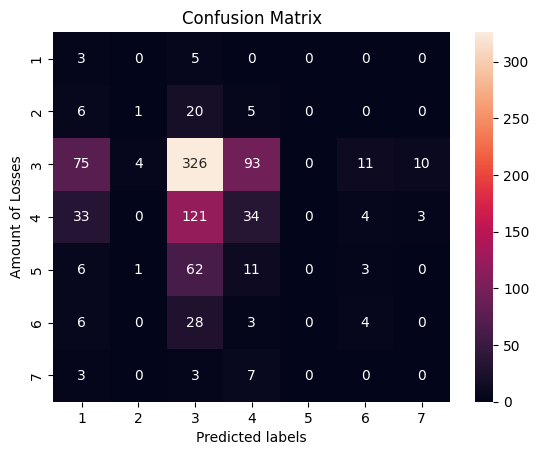

In [419]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Amount of Losses');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7']); ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7']);
#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/ScreenShots/Naive_Bayes_Confusion_Matrix_2.png')
plt.show()

# Categorical Naive Bayes

In [420]:
# loading in the csv
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Combined_Teams_2024_Updated.csv')

# Dropping the columns that are non-discrete
# Dropping the columns stat_toal, hp, attack, defense, special_attack, special_defense, speed, move_1_power, move_1_effect, move_1_accuracy, move_2_power, move_2_effect, move_2_accuracy, move_3_power, move_3_effect, move_3_accuracy, move_4_power, move_4_effect, move_4_accuracy
df = df.drop(['wins','losses','stat_total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'move_1_power', 'move_1_effect', 'move_1_effect_chance', 'move_1_accuracy','move_1_generation', 'move_2_power', 'move_2_effect','move_2_effect_chance', 'move_2_accuracy','move_2_generation', 'move_3_power', 'move_3_effect','move_3_effect_chance', 'move_3_accuracy','move_3_generation', 'move_4_power', 'move_4_effect','move_4_effect_chance', 'move_4_accuracy','move_4_generation','type', 'pokemon_generation'], axis=1)
# Dropping the type 2 column as it has a lot of missing values as well as type 1 column as its data is captured in the type column
df = df.drop(['type_one', 'type_two'], axis=1)
#split into 4 different dataframes based on the tournament
df_worlds = df[df['tournament'] == 'worlds']
df_LAI = df[df['tournament'] == 'latin america international']
df_EI = df[df['tournament'] == 'europe international']
df_NI = df[df['tournament'] == 'north america international']

# Based on the Tournament Column we will change the rank column to be 'great' if the rank is in the top 20%, 'okay' if the rank is in the middle 60%, and 'bad' if the rank is in the bottom 20%
# Worlds Has 106 Teams so the top 20% is up to rank 21, the middle 60% is above 21 and below 84, and the bottom 20% is anything at or above 84
df_worlds['rank_category'] = 'bad'  # Default to 'bad'
df_worlds.loc[df_worlds['rank'] <= 21, 'rank_category'] = 'great'
df_worlds.loc[(df_worlds['rank'] > 21) & (df_worlds['rank'] < 84), 'rank_category'] = 'okay'
#LAI has 128 Teams so the top 20% is up to rank 25, the middle 60% is above 25 and below 102, and the bottom 20% is anything at or above 102
df_LAI['rank_category'] = 'bad'  # Default to 'bad'
df_LAI.loc[df_LAI['rank'] <= 25, 'rank_category'] = 'great'
df_LAI.loc[(df_LAI['rank'] > 25) & (df_LAI['rank'] < 102), 'rank_category'] = 'okay'
#EI has 128 Teams so the top 20% is up to rank 25, the middle 60% is above 25 and below 102, and the bottom 20% is anything at or above 102
df_EI['rank_category'] = 'bad'  # Default to 'bad'
df_EI.loc[df_EI['rank'] <= 25, 'rank_category'] = 'great'
df_EI.loc[(df_EI['rank'] > 25) & (df_EI['rank'] < 102), 'rank_category'] = 'okay'
#NI has 252 Teams so the top 20% is up to rank 50, the middle 60% is above 50 and below 201, and the bottom 20% is anything at or above 201
df_NI['rank_category'] = 'bad'  # Default to 'bad'
df_NI.loc[df_NI['rank'] <= 50, 'rank_category'] = 'great'
df_NI.loc[(df_NI['rank'] > 50) & (df_NI['rank'] < 201), 'rank_category'] = 'okay'
# sort the dataframes by rank
df_worlds = df_worlds.sort_values(by='rank')
df_LAI = df_LAI.sort_values(by='rank')
df_EI = df_EI.sort_values(by='rank')
df_NI = df_NI.sort_values(by='rank')

#combine the dataframes back into one
df = pd.concat([df_worlds, df_LAI, df_EI, df_NI])
df.head()

C:\Users\ryhen\AppData\Local\Temp\ipykernel_34512\478669407.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_worlds['rank_category'] = 'bad'  # Default to 'bad'
C:\Users\ryhen\AppData\Local\Temp\ipykernel_34512\478669407.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LAI['rank_category'] = 'bad'  # Default to 'bad'
C:\Users\ryhen\AppData\Local\Temp\ipykernel_34512\478669407.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,tournament,rank_category
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1,worlds,great
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1,worlds,great
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1,worlds,great
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1,worlds,great
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1,worlds,great


In [421]:
# Select features and target variable
features = ['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4']
target = 'rank_category'

features = df[features]
target = df[target]

# Encode the categorical features
features = features.apply(LabelEncoder().fit_transform)
features

# Define X (features) and y (target)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Categorical Naive Bayes model
model = CategoricalNB()
model.fit(X_train, y_train)



CategoricalNB()

In [422]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)


0.5028058361391695
              precision    recall  f1-score   support

         bad       0.31      0.18      0.23       221
       great       0.20      0.11      0.14       154
        okay       0.58      0.76      0.66       516

    accuracy                           0.50       891
   macro avg       0.36      0.35      0.34       891
weighted avg       0.45      0.50      0.46       891



array([[ 39,  18, 164],
       [ 14,  17, 123],
       [ 72,  52, 392]], dtype=int64)

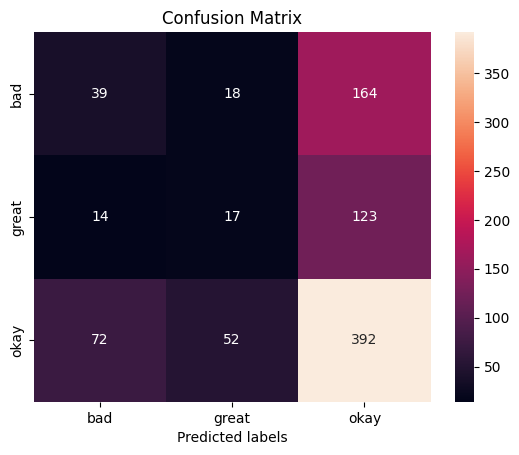

In [423]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'great', 'okay']); ax.yaxis.set_ticklabels(['bad', 'great', 'okay']);
#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/ScreenShots/Categorical_Naive_Bayes_Confusion_Matrix.png')
plt.show()
